In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.5MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=66174d3f5ecbf0ffcc614009323bc5eef5d701ea16b0ed9371d3479f662f3425
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=ca3788ae22425cda398aa822459ceff194b0fbdda9ebbe86c402737420e35db8
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [ ]:
df = pd.read_json('pretty_jp_tweets_feedback.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

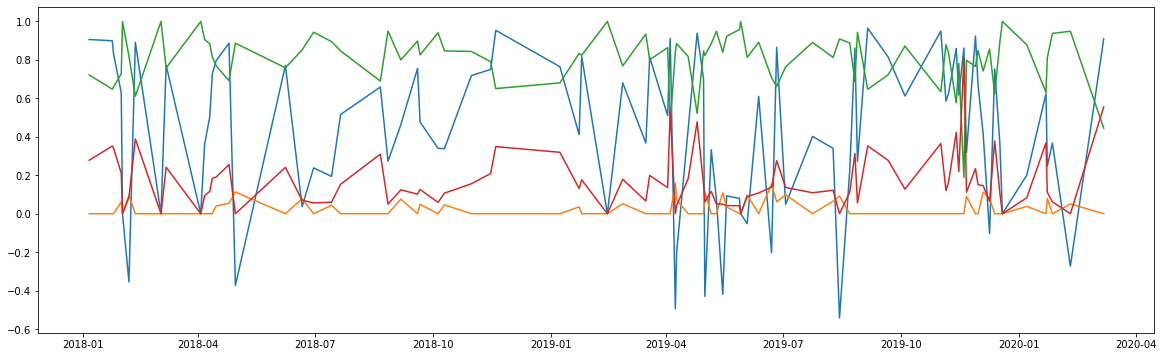

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [ ]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'More headlines on http://CUToday.info\xa0: That grocery store worker who helped autistic young man in a video that went viral? One CU has a surprise for him. Plus, JPMorgan Chase explains branch expansion; @NavyFederal enhances card; @WOCCU has feedback for FSB'

In [ ]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'More headlines on http://CUToday.info\xa0: That grocery store worker who helped autistic young man in a video that went viral? One CU has a surprise for him. Plus, JPMorgan Chase explains branch expansion; @NavyFederal enhances card; @WOCCU has feedback for FSB'

Text(0, 0.5, 'Sentiment')

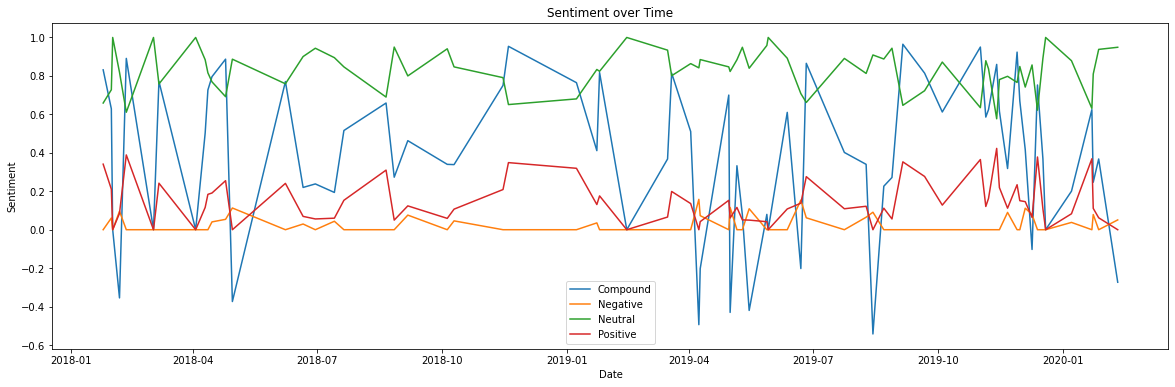

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

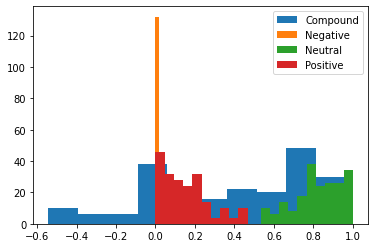

In [ ]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

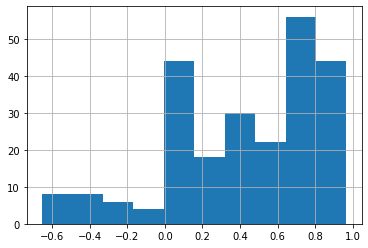

In [ ]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.950,0.050,0.2732
1,0.690,0.310,0.6590
2,0.950,0.050,0.2732
3,0.690,0.310,0.6590
4,0.445,0.555,0.9099
...,...,...,...
235,0.816,0.184,0.7269
236,0.926,0.074,0.2481
237,0.842,0.158,0.7579
238,0.906,0.094,0.3612


In [54]:
#Importing Various twitter data
# all JP files

#Feedback
df = pd.read_json('pretty_jp_tweets_feedback.json')


In [55]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [56]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [57]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(240, 61)


In [58]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [59]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [60]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [61]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[http://CUToday.info],,0,[],0,FrankCUToday,More headlines on http://CUToday.info : That g...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-27 13:47:06,2018-08-27 13:47:06,1034074832617398272,/FrankCUToday/status/1034074832617398272,154156819,Frank J. Diekmann,,0.0,0.950,0.050,0.2732
1,False,[],[],False,False,1,[],,0,[],0,simple_malibog,Anyone whose currently employed with American ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-21 22:41:11,2018-08-21 22:41:11,1032034911924846592,/simple_malibog/status/1032034911924846592,778005293863055360,OliverPaz,,0.0,0.690,0.310,0.6590
2,False,[],[],False,False,0,[http://CUToday.info],,0,[],0,FrankCUToday,More headlines on http://CUToday.info : That g...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-27 13:47:06,2018-08-27 13:47:06,1034074832617398272,/FrankCUToday/status/1034074832617398272,154156819,Frank J. Diekmann,,0.0,0.950,0.050,0.2732
3,False,[],[],False,False,1,[],,0,[],0,simple_malibog,Anyone whose currently employed with American ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-21 22:41:11,2018-08-21 22:41:11,1032034911924846592,/simple_malibog/status/1032034911924846592,778005293863055360,OliverPaz,,0.0,0.690,0.310,0.6590
4,False,[],[],False,True,0,[],1235865853398093825,0,"[{'screen_name': 'THSch_Careers', 'user_id': '...",0,TalbotHeathSch,"Feedback from pupils has been great, very insp...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-07 08:47:42,2020-03-07 08:47:42,1236211914071515136,/TalbotHeathSch/status/1236211914071515137,228340840,Talbot Heath School,,0.0,0.445,0.555,0.9099


In [62]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [63]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.217373 -0.129561       1        1  28.234363
1     -0.206852  0.005971       2        1  17.821016
6     -0.042149  0.360533       3        1  10.579852
4     -0.173048 -0.032729       4        1   9.165219
5     -0.121503 -0.104604       5        1   7.410719
2     -0.041229 -0.067242       6        1   7.383618
3     -0.072271 -0.104632       7        1   6.757560
9      0.186768  0.085274       8        1   5.486087
7      0.176315  0.009591       9        1   4.165482
0      0.076597 -0.022600      10        1   2.996084, topic_info=      Term       Freq      Total Category  logprob  loglift
29  morgan  20.000000  20.000000  Default  30.0000  30.0000
35   thank  12.000000  12.000000  Default  29.0000  29.0000
13   event   8.000000   8.000000  Default  28.0000  28.0000
36  thanks  10.000000  10.000000  Default  27.0000  27.0000
30     new   9.000000   9.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
24    like   0.250096   8.884827  Topic10  -3.7842  -0.0624
30     new   0.250095   9.417093  Topic10  -3.7842  -0.1206
36  thanks   0.250095  10.154821  Topic10  -3.7842  -0.1960
40     way   0.250095   9.866939  Topic10  -3.7842  -0.1672
11  crypto   0.250095   9.071095  Topic10  -3.7842  -0.0831

[448 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.820158       anti
1         6  0.121800     better
1         8  0.730801     better
2         1  0.354085        bit
2         4  0.472114        bit
...     ...       ...        ...
41        1  0.734290       week
41        6  0.183572       week
42        1  0.735649  worldnews
43        2  0.344360        www
43        5  0.573933        www

[96 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 7, 5, 6, 3, 4, 10, 8, 1])

In [64]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
6     -0.141718+0.000000j  0.000000+0.000000j       1        1  41.891600
1      0.167234+0.000000j  0.000000+0.000000j       2        1  21.028089
7      0.122653+0.000000j  0.000000+0.000000j       3        1   4.636771
9     -0.021167+0.000000j  0.000000+0.000000j       4        1   4.634791
8     -0.021167+0.000000j -0.000000+0.000000j       5        1   4.634791
5     -0.021167+0.000000j -0.000000+0.000000j       6        1   4.634791
4     -0.021167+0.000000j  0.000000+0.000000j       7        1   4.634791
3     -0.021167+0.000000j  0.000000+0.000000j       8        1   4.634791
2     -0.021167+0.000000j -0.000000+0.000000j       9        1   4.634791
0     -0.021167+0.000000j  0.000000+0.000000j      10        1   4.634791, topic_info=      Term      Freq     Total Category  logprob  loglift
1  twitter 

In [65]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1     -0.134788 -0.0       1        1  70.732964
0      0.340692 -0.0       2        1   8.433542
9     -0.025738  0.0       3        1   2.604187
8     -0.025738  0.0       4        1   2.604187
7     -0.025738  0.0       5        1   2.604187
6     -0.025738 -0.0       6        1   2.604187
5     -0.025738 -0.0       7        1   2.604187
4     -0.025738  0.0       8        1   2.604187
3     -0.025738 -0.0       9        1   2.604187
2     -0.025738 -0.0      10        1   2.604187, topic_info=       Term      Freq     Total Category  logprob  loglift
10      pic  6.000000  6.000000  Default  13.0000  13.0000
3       del  5.000000  5.000000  Default  12.0000  12.0000
4      dice  5.000000  5.000000  Default  11.0000  11.0000
5       era  5.000000  5.000000  Default  10.0000  10.0000
8   mercado  5.000000  5.000000  Default   9.0000   9.0000
..      ...       ...       ...      ...      ...      ...
8   mercado  0.137516  5.417353  Topic10  -2.5649  -0.0256
5       era  0.137516  5.417353  Topic10  -2.5649  -0.0256
4      dice  0.137516  5.417353  Topic10  -2.5649  -0.0256
3       del  0.137516  5.417353  Topic10  -2.5649  -0.0256
10      pic  0.137516  6.517623  Topic10  -2.5649  -0.2105

[143 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.821140    bankia
1         1  0.776069     bolsa
2         1  0.776069    cuando
3         1  0.738368       del
4         1  0.738368      dice
5         1  0.738368       era
6         1  0.854015      http
7         1  0.821140    juicio
8         1  0.738368   mercado
9         1  0.776069  negativo
10        2  0.767151       pic
11        1  0.738368       que
12        1  0.776069     salio, R=13, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 10, 9, 8, 7, 6, 5, 4, 3])

In [66]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(176, 25)
(26, 25)
(38, 25)
